<a href="https://colab.research.google.com/github/ali7amie/Location/blob/main/Location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the data file from github
!git clone https://github.com/ali7amie/Location.git
%cd /content/Location/

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cloning into 'Location'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
/content/Location


#Import data

In [245]:
#import location.csv file into a dataframe
data=pd.read_csv('location.csv')
display(data)
#show data types
print(data.dtypes)


,type_propriete,quartier,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
0,Complète,Observatoire,75014,2,1.0,NaN,1.0,60.0,9,100.0,34.0
1,Complète,Hôtel-de-Ville,75004,4,1.0,2.0,2.0,90.0,272,94.0,119.0
2,Complète,Opéra,75009,2,1.0,1.0,1.0,130.0,6,96.0,64.0
3,Complète,Popincourt,75011,2,1.0,1.0,1.0,75.0,26,98.0,91.0
4,Chambre privée,Entrepôt,75010,6,1.0,1.0,3.0,170.0,149,92.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...
41433,Complète,Bourse,75002,4,2.0,2.0,2.0,101.0,0,NaN,NaN
41434,Complète,Bourse,75002,4,2.0,2.0,2.0,101.0,0,NaN,NaN
41435,Complète,Bourse,75002,4,2.0,2.0,2.0,118.0,0,NaN,NaN
41436,Complète,Opéra,75009,4,1.0,2.0,2.0,192.0,0,NaN,NaN


type_propriete          object
quartier                object
arrondissement           int64
capacite_accueil         int64
salle_de_bain          float64
chambres               float64
lits                   float64
prix                   float64
nb_commentaires          int64
note_moyenne           float64
nb_mois_en_activite    float64
dtype: object
type_propriete            0
quartier                  0
arrondissement            0
capacite_accueil          0
salle_de_bain             0
chambres               8224
lits                    145
prix                      0
nb_commentaires           0
note_moyenne           9025
nb_mois_en_activite    8271
dtype: int64


In [247]:
#show anomalies in data
data.isnull().sum()

type_propriete            0
quartier                  0
arrondissement            0
capacite_accueil          0
salle_de_bain             0
chambres               8224
lits                    145
prix                      0
nb_commentaires           0
note_moyenne           9025
nb_mois_en_activite    8271
dtype: int64

#Prices distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


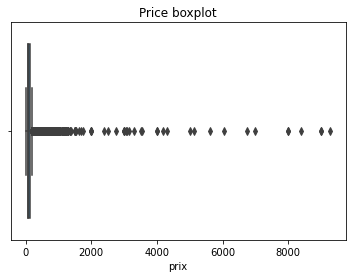

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


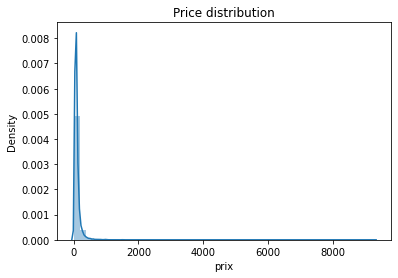

count    41438.000000
mean       108.505309
std        171.468815
min          8.000000
25%         59.000000
50%         80.000000
75%        118.000000
max       9280.000000
Name: prix, dtype: float64
median 80.0


In [255]:
plt.figure()
plt.title('Price boxplot')
sns.boxplot(data['prix'])
plt.show()

plt.figure()
plt.title('Price distribution')
sns.distplot(data['prix'])
plt.show()

print(data['prix'].describe())
print('median {}'.format(data['prix'].median()))

The boxplot and histogram show a unimodal price distribution with an important population of outliers, a realistic affordable range of prices could be below 200 euros. The histogram and the numerical summary below show those prices'distribution, they represent 91.4 % of all samples

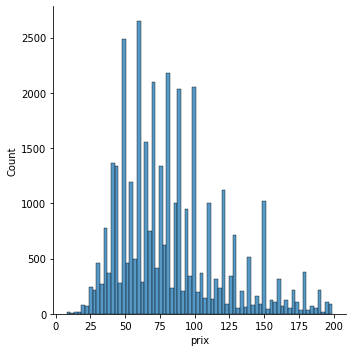

In [301]:
#isolate samples with prices below 200 euros
affordable_data=data[data['prix']<200]
affordable_price=data[data['prix']<200]['prix']
len(affordable_price)/len(data)

sns.displot(affordable_price)


In [256]:
print(affordable_price.describe())
print('median {}'.format(affordable_price.median()))

count    37888.000000
mean        83.206213
std         37.062426
min          8.000000
25%         55.000000
50%         75.000000
75%        100.000000
max        199.000000
Name: prix, dtype: float64
median 75.0


#Price per district

##Outiliers study- Which districts have the most outliers/luxurious units?

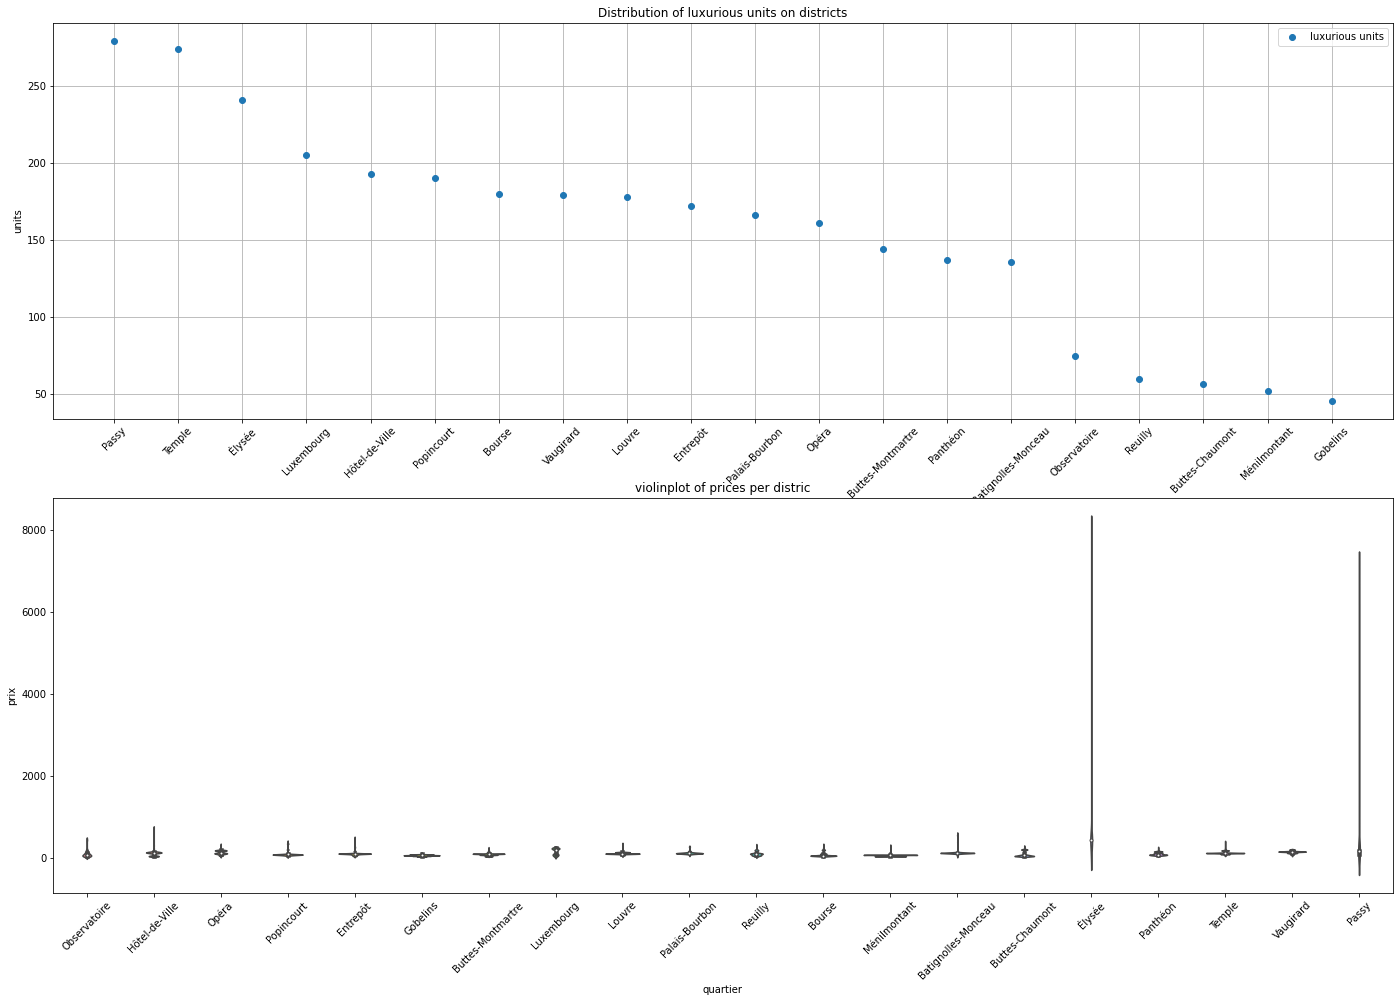

In [295]:
high_prices=data[data['prix']>200]


plt.figure(figsize=(24,16))
plt.subplot(211)
plt.title('Distribution of luxurious units on districts')
plt.errorbar(high_prices['quartier'].value_counts().index,high_prices['quartier'].value_counts(),fmt='o',label='luxurious units')
plt.ylabel('units')
plt.xticks(rotation = 45)
plt.legend()
plt.grid()

plt.subplot(212)
plt.title('violinplot of prices per distric')
sns.violinplot(data=data['prix'],x=data['quartier'],y=data['prix'])
plt.xticks(rotation = 45)
plt.show()


The plot in the top show the distribution of units with prices above 200 euros (3125/41438 units) on different district of Paris. Passy, Temple, Elysée contain the most of these outilier units. The bottom violin plot show extremely high prices in Elysée and Passy.

##Outiliers study- Does outliers represent any special trend unless they are located in busy area?

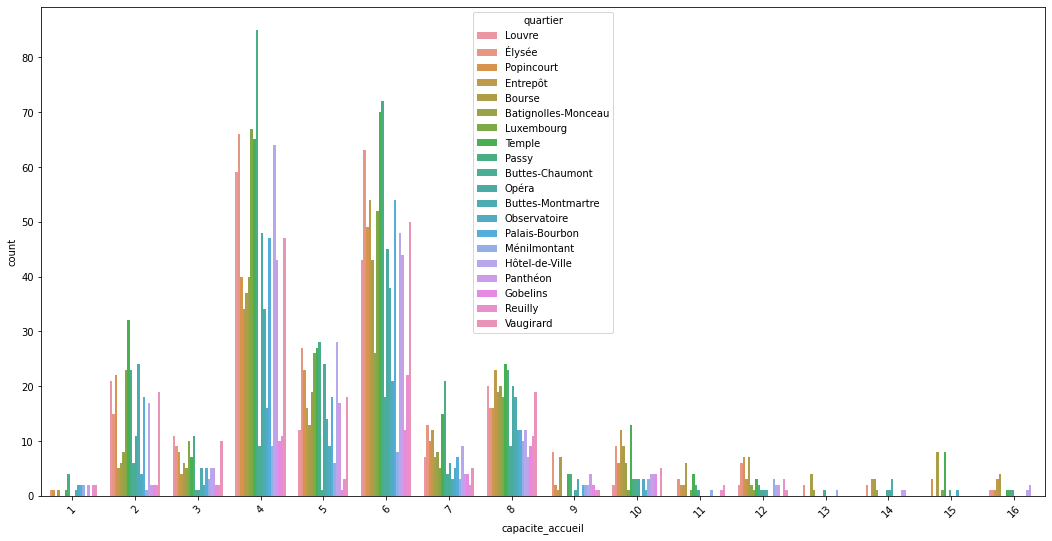

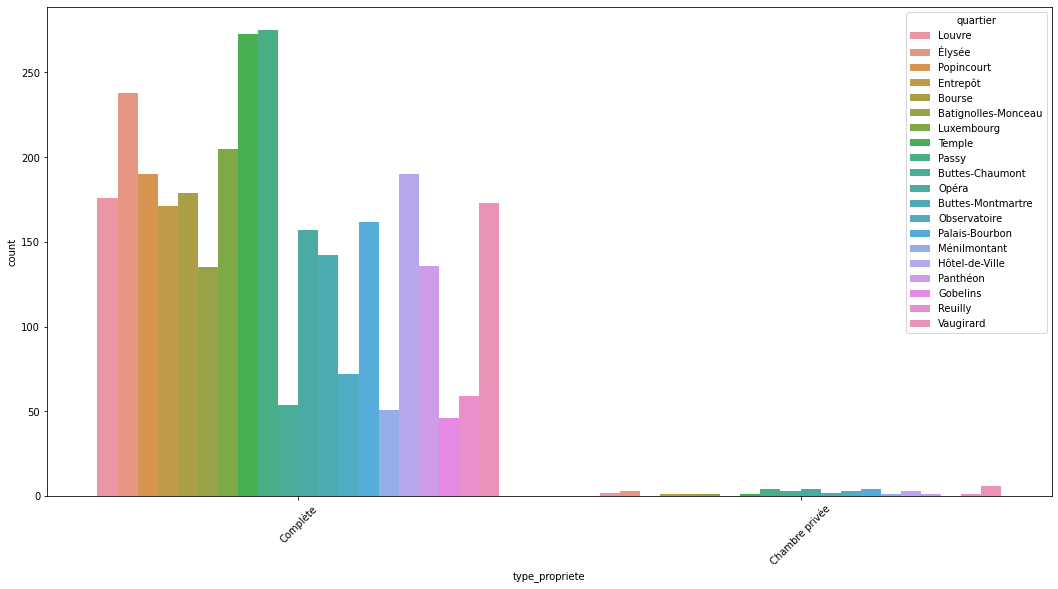

In [299]:
plt.figure(figsize=(18,9))
plt.title('Outliers distribution as function of unit capacity and districts')
sns.countplot(data=high_prices,x='capacite_accueil',hue='quartier')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(18,9))
plt.title('Outliers distribution as function of unit type and districts')
sns.countplot(data=high_prices,x='type_propriete',hue='quartier')
plt.xticks(rotation = 45)
plt.show()

Outliers don't represent any functional advantage on affordable units, they both share the same distributions on capacity and type

## Affordable units study - What is the cheapest area to stay?

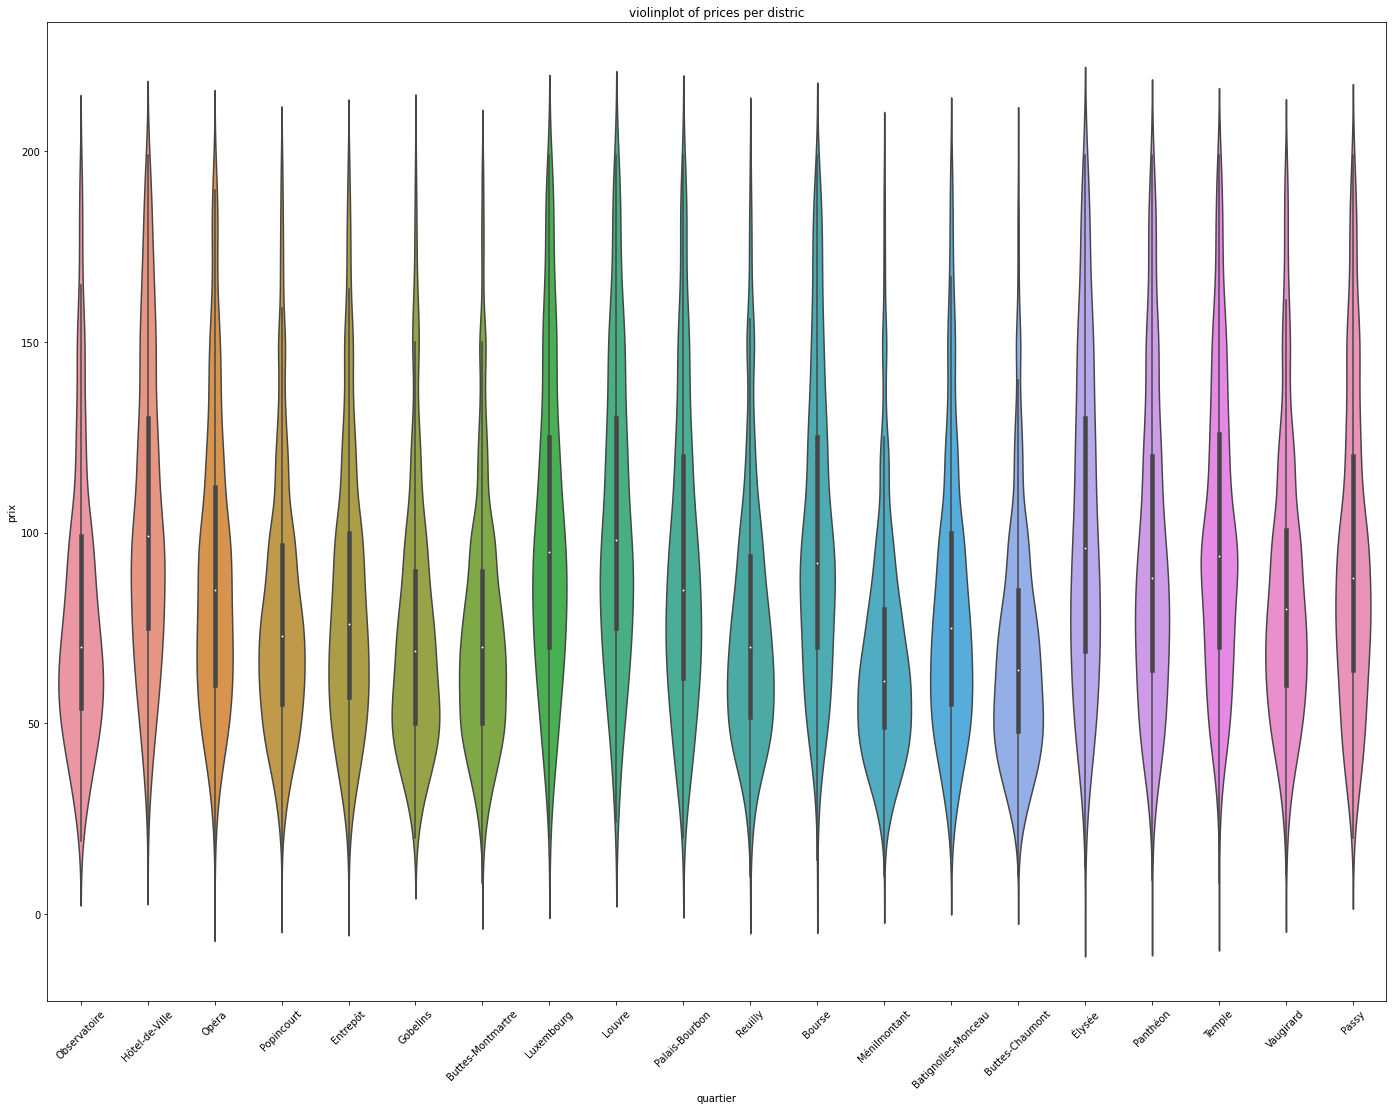

In [241]:
plt.figure(figsize=(24,18))
plt.title('violinplot of affordable prices per distric')
sns.violinplot(data=affordable_price,x=data['quartier'],y=affordable_price)
plt.xticks(rotation = 45)

plt.show()

In [303]:
mean_price_per_district=[]
median_price_per_district=[]

for i in data['quartier'].unique():
    mean_price_per_district.append(affordable_data[affordable_data['quartier']==i]['prix'].mean())
    median_price_per_district.append(affordable_data[affordable_data['quartier']==i]['prix'].median())



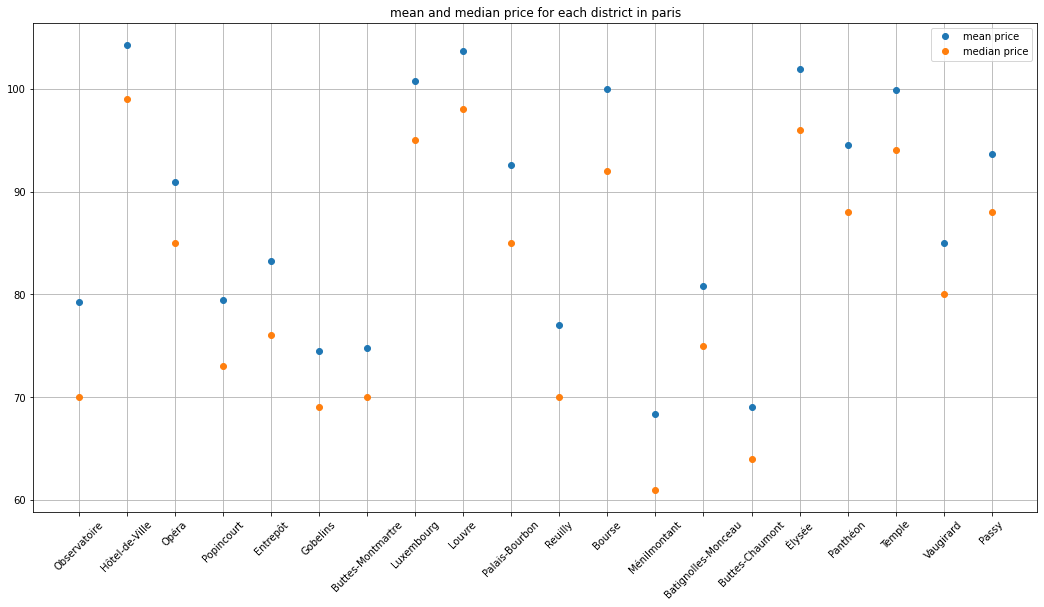

In [304]:
plt.figure(figsize=(18,9))
plt.title('mean and median price for each district in paris')
plt.errorbar(data['quartier'].unique(),mean_price_per_district,fmt='o',label='mean price')
plt.errorbar(data['quartier'].unique(),median_price_per_district,fmt='o',label='median price')
plt.legend()
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Menilmontant and Buttes-Chaumont have the lowest price

#Rental units parameters



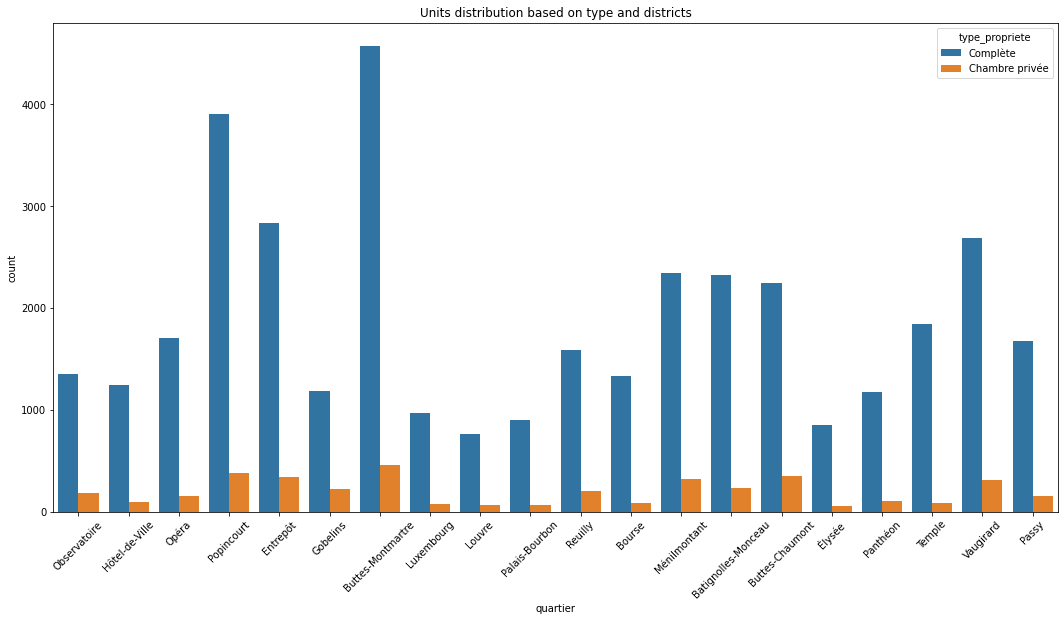

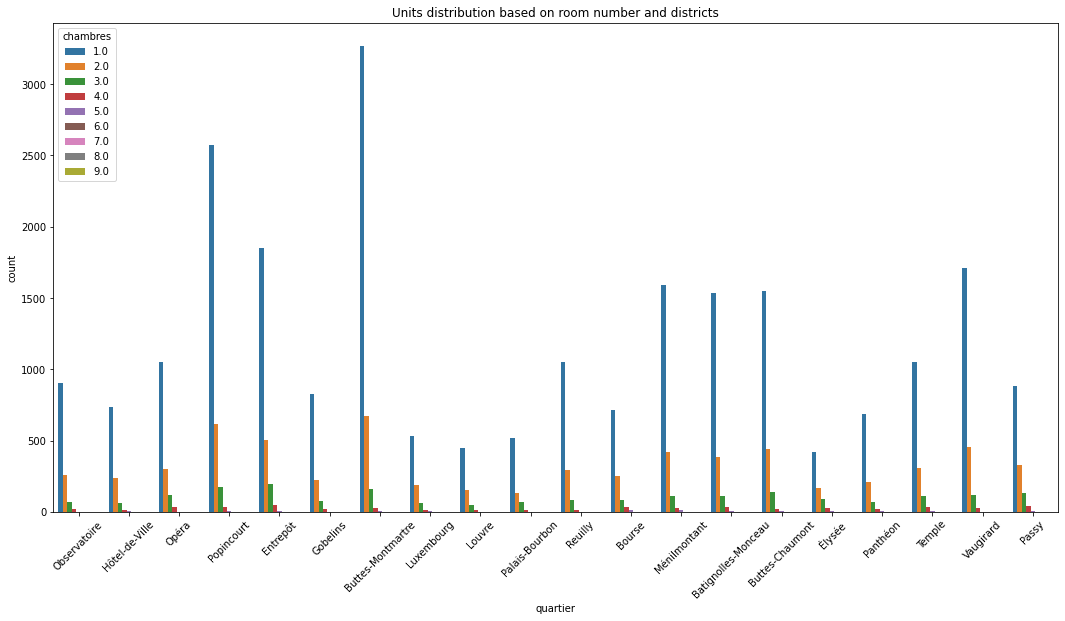

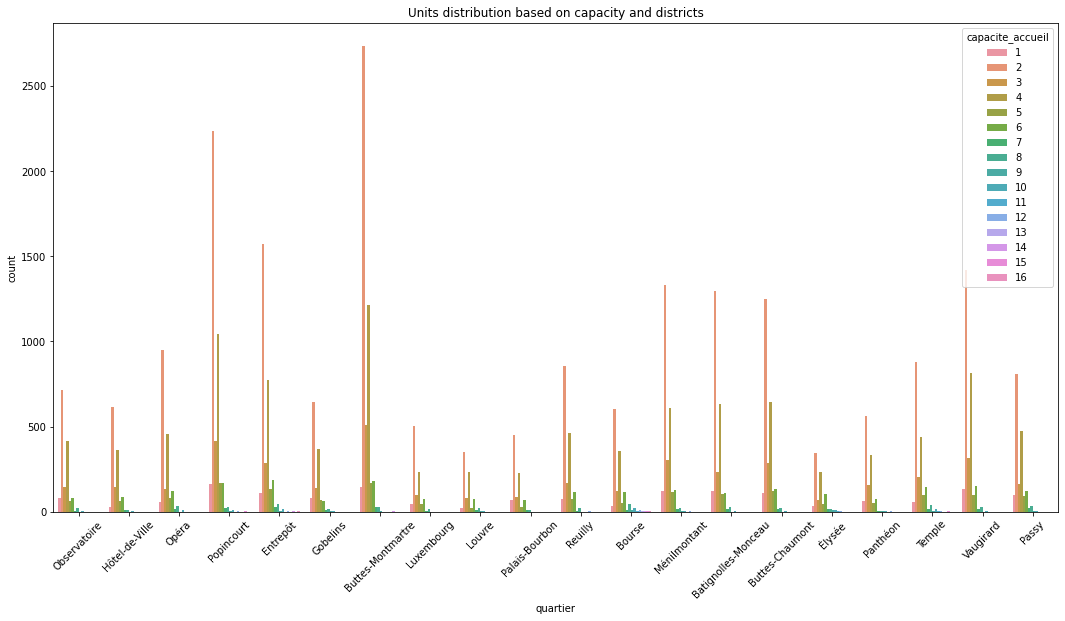

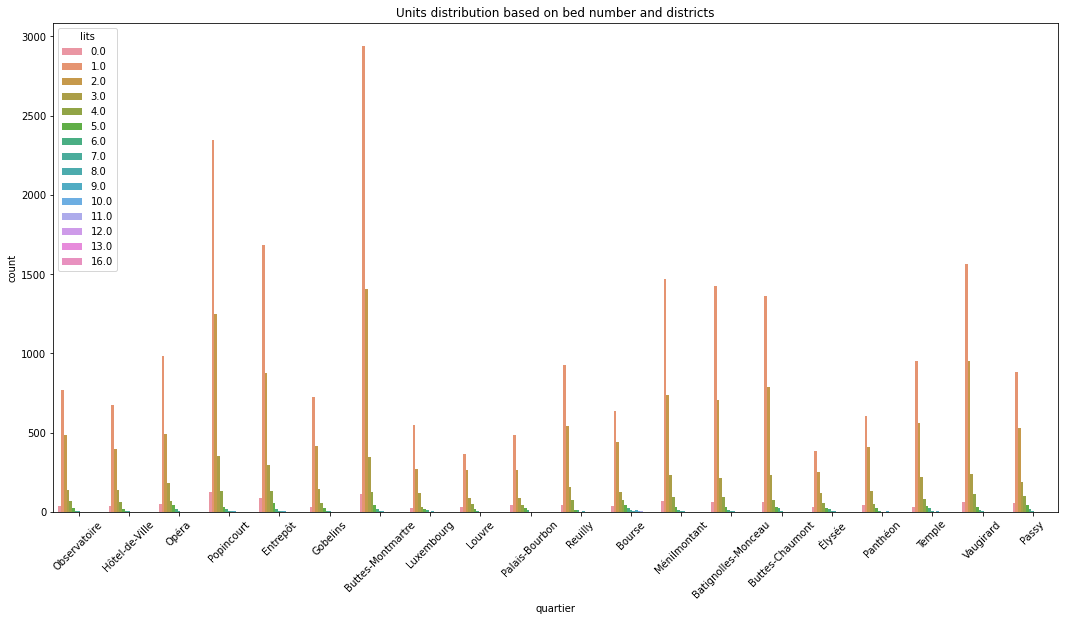

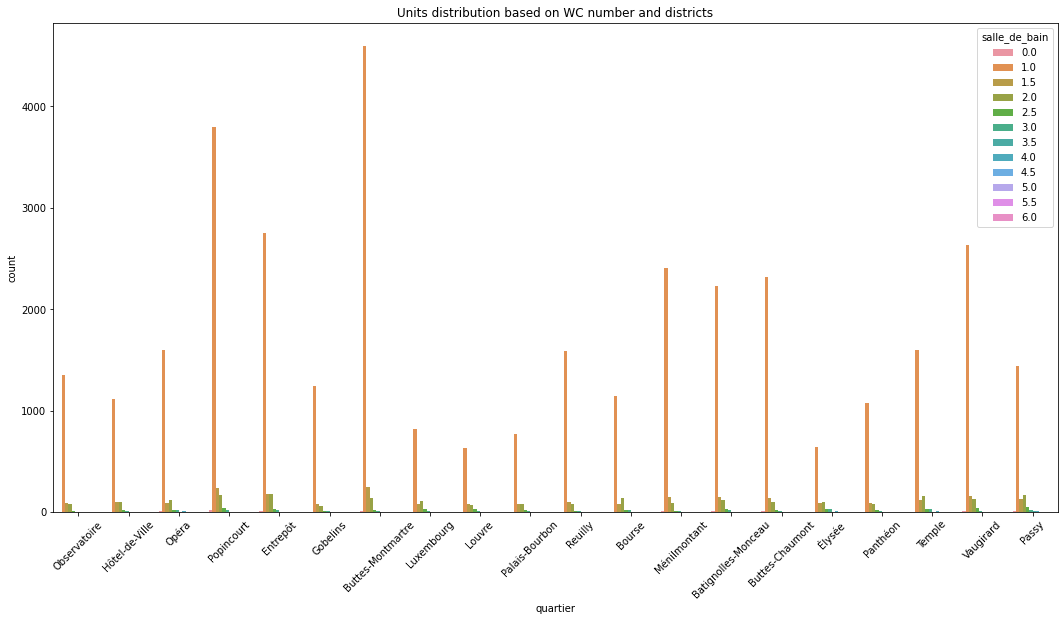

In [312]:
plt.figure(figsize=(18,9))
plt.title('Units distribution based on type and districts')
sns.countplot(data=data,hue='type_propriete',x='quartier')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(18,9))
plt.title('Units distribution based on room number and districts')
sns.countplot(data=data,hue='chambres',x='quartier')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(18,9))
plt.title('Units distribution based on capacity and districts')
sns.countplot(data=data,hue='capacite_accueil',x='quartier')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(18,9))
plt.title('Units distribution based on bed number and districts')
sns.countplot(data=data,hue='lits',x='quartier')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(18,9))
plt.title('Units distribution based on WC number and districts')
sns.countplot(data=data,hue='salle_de_bain',x='quartier')
plt.xticks(rotation = 45)
plt.show()






In [167]:
data['type_propriete'].value_counts()
data['capacite_accueil'].value_counts()
data['salle_de_bain'].value_counts()
data['chambres'].value_counts()
data['lits'].value_counts()

1.0     21727
2.0     12039
3.0      3765
4.0      1588
0.0      1080
5.0       617
6.0       279
7.0        84
8.0        50
9.0        37
10.0       10
11.0        8
12.0        6
13.0        2
16.0        1
Name: lits, dtype: int64

In [309]:
data['type_propriete'].value_counts()/len(data)


Complète          0.90458
Chambre privée    0.09542
Name: type_propriete, dtype: float64

9.5 % of units are rooms while 90.5 % are appartments. The plot of unit distribution as a function of capacity show that the majority of rental unit have pair capacity, in particular 2 or 4 person. This is confirmed by the bed data, but here there is a little confusion as one bed could be simple or double. The majority of units have one bathroom. As a result an optimal recipe has one room and bathroom with 2 people capacity.

#Prices based on rental units parameters

In [324]:
len(affordable_price.value_counts())
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200]
affordable_data['binned_price'] = pd.cut(affordable_price, bins)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [325]:
data['binned_price'].value_counts()

(50, 75]      11119
(75, 100]      9730
(25, 50]       7612
(100, 125]     3870
(125, 150]     2969
(150, 175]     1177
(175, 200]     1009
(0, 25]         402
Name: binned_price, dtype: int64

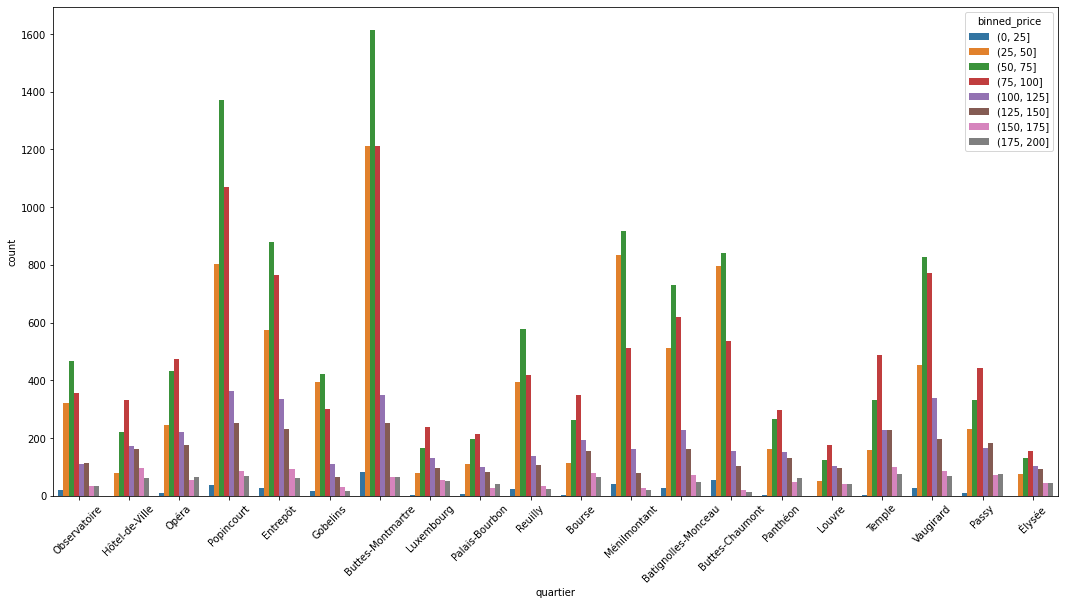

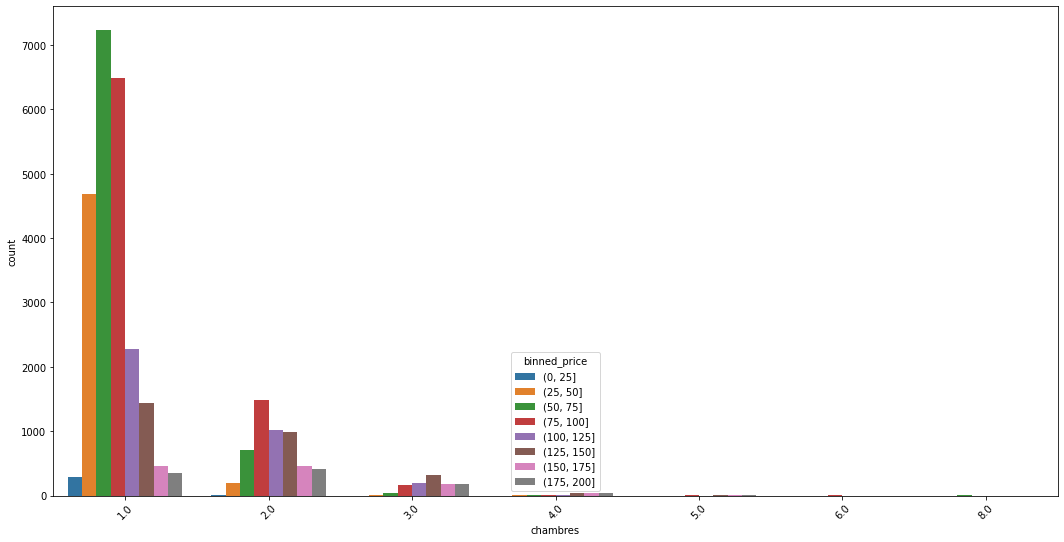

In [327]:

plt.figure(figsize=(18,9))
sns.countplot(data=affordable_data,x='quartier',hue='binned_price')
plt.xticks(rotation = 45)
plt.show()


plt.figure(figsize=(18,9))
sns.countplot(data=affordable_data,x='chambres',hue='binned_price')
plt.xticks(rotation = 45)
plt.show()

#Rating and feasability

In [332]:
bins=[0,50,60,70,80,90,100]
data['binned_rank'] = pd.cut(data['note_moyenne'], bins)


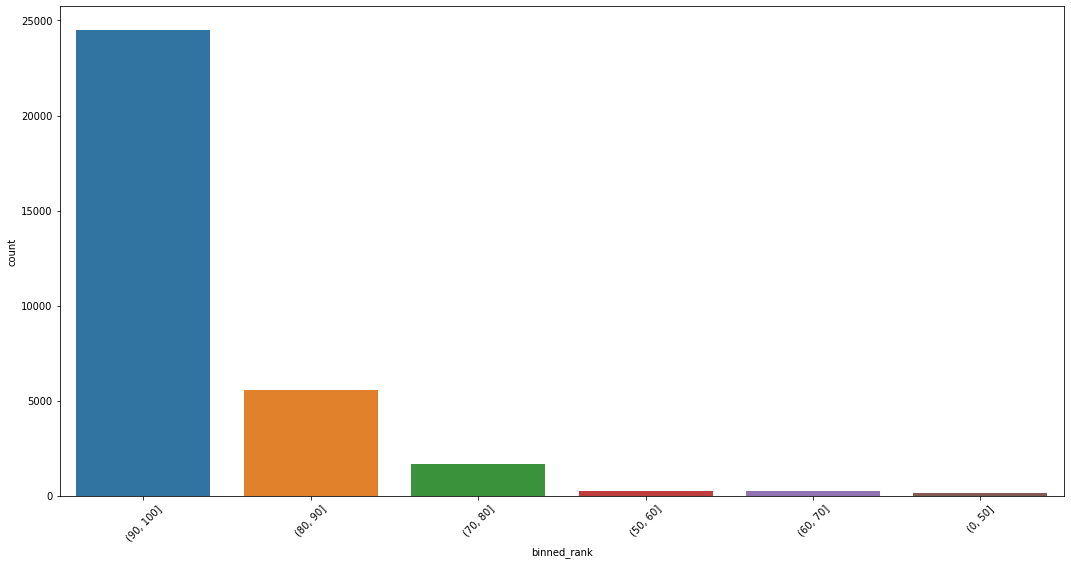

In [333]:
import seaborn as sns
order=data['binned_rank'].value_counts().index

plt.figure(figsize=(18,9))
sns.countplot(data=data,x='binned_rank',order=order)
plt.xticks(rotation = 45)
plt.show()


In [352]:
len(data[data['nb_mois_en_activite']<12])/len(data)

0.37887928954100103

In [350]:
data[data['note_moyenne']<50]['nb_mois_en_activite'].value_counts()

0.0     101
1.0      14
2.0       5
5.0       3
8.0       1
9.0       1
26.0      1
6.0       1
11.0      1
3.0       1
12.0      1
15.0      1
4.0       1
Name: nb_mois_en_activite, dtype: int64

In [353]:
data[data['note_moyenne']<90]['nb_mois_en_activite'].value_counts()

0.0      1142
1.0       431
2.0       301
3.0       215
4.0       205
         ... 
118.0       1
113.0       1
117.0       1
102.0       1
108.0       1
Name: nb_mois_en_activite, Length: 110, dtype: int64

bad rating is usually happening with beginners units (below 12 months), but the opposit is also true. Mostly beginners tend to recieve high rating.

# Conclusion

The data describes 41438 rental units in Paris. A first statistical summary shows a large population of outliers biasing the measurement. In particular, while 37888 apartments have prices below 200 euros, 3125 outliers have prices reaching 9000 euros. These outliers didn't show any particular functional trend unless they are located in fancy areas. A complete price construction on units' parameters requires apartment surface area. As a guideline, prices are centered on 75 euros with a standard deviation of 37 euros. An optimal apartment has a single room, a single bathroom, and a capacity of 2 people.